In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
path = r'C:\Users\HP\Desktop\MS\CV\assignment\flower_photos\flower_photos'
classes = []
labels = []
features = []
for i in os.listdir(path):
    path1 = os.path.join(path, i)
    classes.append(i)
    for j in os.listdir(path1):
        labels.append(len(classes))
        img = cv2.imread(os.path.join(path1,j))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        keypoints,descriptors = sift.detectAndCompute(img,None)
        features.append(descriptors)
    print(descriptors.shape)
    print(f'Loaded {i} images')

(740, 128)
Loaded daisy images
(296, 128)
Loaded dandelion images
(449, 128)
Loaded roses images
(495, 128)
Loaded sunflowers images
(2247, 128)
Loaded tulips images


In [13]:
clusters = 60
print(classes)
# kmeans = KMeans(n_clusters=clusters)
# kmeans.fit(features)
# bow_dict = kmeans.cluster_centers_

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
#pd.DataFrame(bow_dict).to_csv('bow')

In [14]:
bow_dict = pd.read_csv(r'C:\Users\HP\Desktop\MS\CV\assignment\bow')
bow_dict.drop('Unnamed: 0',axis=1,inplace=True)
bow_dict = np.array(bow_dict)

In [15]:
def create_feature_bow(img_desc, BoW, clusters):

    X_features = []

    for i in range(len(img_desc)):
        features = np.array([0] * clusters)

        if img_desc[i] is not None:
            distance = cdist(img_desc[i], BoW)

            argmin = np.argmin(distance, axis = 1)

            for j in argmin:
                features[j] += 1
        X_features.append(features)

    return X_features

In [16]:
X_features = create_feature_bow(features,bow_dict,clusters)
print(np.array(X_features).shape)

(3670, 60)


In [18]:
train_features,test_features,train_labels,test_labels = train_test_split(X_features,labels,test_size=0.2,random_state=0)

In [19]:
svm = SVC(C=20,random_state=0)
svm.fit(train_features,train_labels)

SVC(C=20, random_state=0)

In [20]:
print("score on training set params: ", svm.score(train_features, train_labels))
print("score on testing set params: ", svm.score(test_features,test_labels))

score on training set params:  0.819141689373297
score on testing set params:  0.5844686648501363


In [ ]:
test_labels

[1, 1, 2, 2, 3, 3, 4, 4]

In [ ]:
import matplotlib.pyplot as plt

-----------------------------------------------------------------


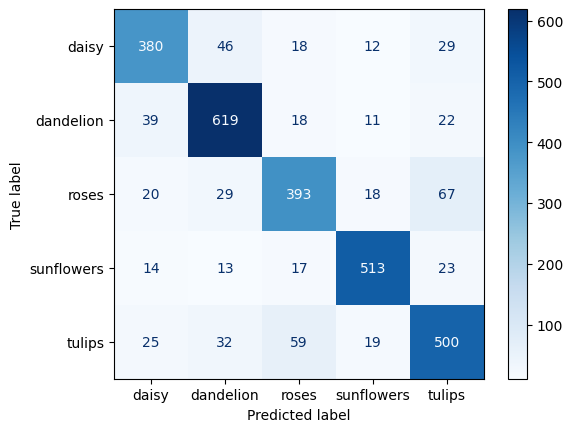

In [21]:
tr_predictions = svm.predict(train_features)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_labels,tr_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

-----------------------------------------------------------------


<AxesSubplot: >

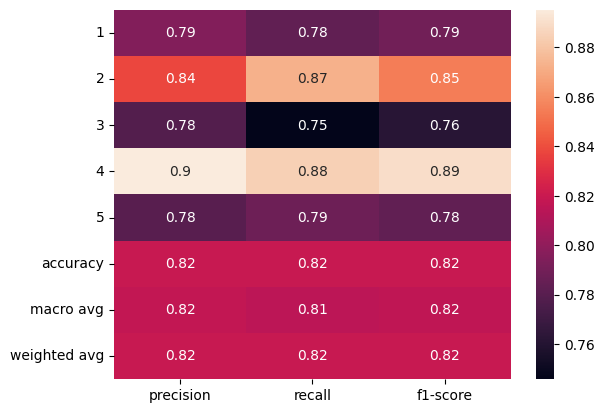

In [22]:
# Classification report
print("-----------------------------------------------------------------")
clf_report = classification_report(train_labels, tr_predictions,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

-----------------------------------------------------------------


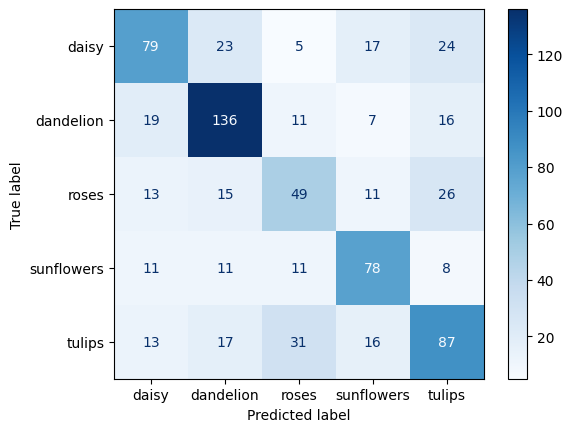

In [23]:
te_predictions = svm.predict(test_features)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_labels,te_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

-----------------------------------------------------------------


<AxesSubplot: >

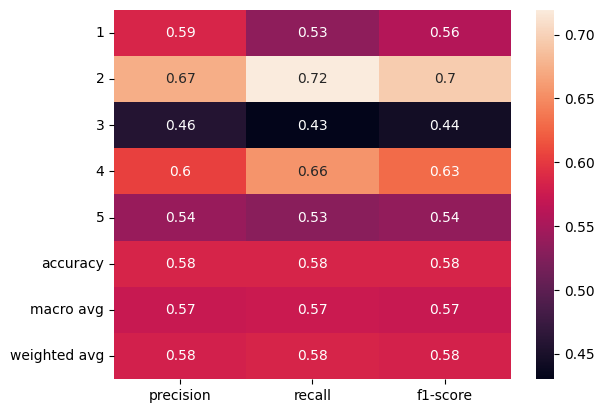

In [24]:
# Classification report
print("-----------------------------------------------------------------")
clf_report = classification_report(test_labels, te_predictions,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)